### High-Frequency Data Analysis and Market Microstructure

시장의 미시 구조적 특성에 대해 알아보고 분석해본다

#### 1. Price Sequences

**1.1 Tick Rules**

틱 규칙이란 거래에 있어서 공격적 거래자의 방향(aggressor side)을 결정하기 위한 알고리즘이다. 다음 논리에 따라서 매수가 주도한 거래는 1, 매도가 주도한 거래가 -1로 labeling을 한다

$$b_t = \begin{cases}
1, ~~ & \mbox{if } \Delta p_t > 0\\
-1, ~~ & \mbox{if } \Delta p_t < 0\\
0, ~~ & \mbox{if } \Delta p_t = 0
\end{cases}$$

여기서 $p_t$는 $t=1,\cdots, T$로 인덱스된 거래 가격이고, $b_0$은 임의로 1로 설정된다. 여러 연구를 통해 틱 규칙은 상대적으로 단순함에도 불구하고 높은 분류 정확도를 가진다.

$\{b_t\}$ 계열의 변환은 정보성 특성을 만들어낼 수 있다. 이런 변환에는 다음과 같은 것들이 있다.

1. 미래 기대값 $E_t[b_{t+1}]$에 대한 Kalman Filter
2. 이런 예측에 대한 구조적 변화
3. $\{b_t\}$ sequence의 Entropy
4. $\{b_t\}$ 런에 대한 Wald-Wolfowitz 테스트로부터의 t값
5. 누적 $\{b_t\}$계열 $\sum_{t=1}^t b_t$의 fractionallly diffrentiated features

**1.2 The Roll Model**

추세가 없는 Random walk를 따르는 중간 가격 계열 $\{m_t\}$를 고려해 보자
$$m_t = m_{t-1} + u_t$$

따라서 가격 변화 $\Delta m_t = m_t - m_{t-1}$는 다음의 정규 분포로부터 독립적이고 동일하게 추출된다

$$\Delta m_t \sim N(0, \sigma_u^2)$$

이러한 가정은 금융 시계열이 추세를 가지고, 이분산적이고, 상관관계를 보이고, 수익률 분포가 비정규 분포라는 모든 경험적 관찰에 상반된다. 관측된 가격 $\{p_t\}$는 매매 호가 스프레드에 대한 순차적 거래의 결과이다

$$p_t = m_t + b_tc$$

여기서 c는 매매 호가 스프레드의 절반이고 $b_t \in \{-1, 1\}$은 공격적 거래자의 방향이다. Roll model은 매수와 매도가 발생활 확률이 동일하고, 잡음으로부터의 독립이라고 가정한다. 이런 가정 하에서 롤은 $c$와 $\sigma_u^2$값을 다음과 같이 도출한다

$$\sigma^2[\Delta p_t] = E[(\Delta p_t)^2] - (E[\Delta p_t])^2 = 2c^2 + \sigma_u^2$$
$$\sigma[\Delta p_t, \Delta p_{t-1}] = -c^2$$

이는 $c = \sqrt{\max\{0, -\sigma[\Delta p_t, \Delta p_{t-1}] \}}$와 $\sigma_u^2 = \sigma^2[\Delta p_t] + 2\sigma[\Delta p_t, \Delta p_{t-1}]$의 결과를 갖게 한다. 결론적으로 매매 호가 스프레드는 가격 변화의 계열 공분산 함수이고, 미시 구조적 잡음을 제거한 참 가격의 잡음은 관측된 잡음과 가격 변화의 계열 공분산의 함수이다

**1.3 High-Low Volatility Estimator**

Parkinson(1980)은 기하 브라운 운동을 따르는 연속적으로 관측되는 가격에 대해 다음을 유도했다

$$E\Big[ \frac{1}{T} \sum_{t=1}^T \Big( \log\Big[\frac{H_t}{L_t}\Big]\Big)\Big] = k_1\sigma_{HL}^2$$
$$E\Big[ \frac{1}{T} \sum_{t=1}^T \Big( \log\Big[\frac{H_t}{L_t}\Big]\Big)\Big] = k_2\sigma_{HL}$$

여기서 $k_1 = 4\log(2), k_1 = \sqrt{\frac{8}{\pi}}$, $H_t$는 바 t에 대한 고가이고, $L_t$는 바 t에 대한 저가이다. 그러면 변동성 특성 $\sigma_{HL}$은 관측된 고가-저가에 기초해 안정적으로 계산 가능하다

**1.4 Corwin and Schultz**

Corwin, Schultz는 매매 호가 스프레드를 가격의 퍼센티지로 다음과 같이 계산할 수 있다는 것을 보였다

$$S_t = \frac{2(e^{\alpha_t}-1)}{1+e^{\alpha_t}}$$

여기서

$$\alpha_t = \frac{\sqrt{2\beta_t} - \sqrt{\beta_t}}{3 - 2\sqrt{2}} - \sqrt{\frac{\gamma_t}{3-2\sqrt{2}}}$$
$$\beta_t = E \Big[\sum_{j=0}^1 \Big[\log \Big(\frac{H_{t-j}}{L_{t-j}} \Big) \Big]^2\Big]$$
$$\gamma_t = \Big[\log \Big(frac{H_{t-1, t}}{L_{t-1, t}}\Big) \Big]^2$$

$H_{t-1,t}$는 두 기간에 걸친 고가이고, $L_{t-1,t}$는 두 기간에 걸친 저가이다. Corwin-Schultz의 식에서는 변동성이 보이지 않는데, 이는 고가/저가 추정량으로 대체되었기 때문이다. 이 모델로써 벡커-파킨슨 변동성을 유도할 수 있다

#### example 1

Corwin & Schultz 알고리즘을 Apple 일별 가격 데이터에 적용하여 매매 호가 스프레드를 추정해 보자

In [73]:
import pandas as pd, numpy as np

def getBeta(series : pd.DataFrame, sl : int) :
    h1 = series[['High','Low']].values
    h1 = np.log(h1[:,0]/h1[:,1])**2
    h1 = pd.Series(h1, index = series.index)
    beta = h1.rolling(window = 2).sum()
    beta = beta.rolling(window = sl).mean()
    return beta.dropna()

def getGamma(series : pd.DataFrame) :
    h2 = series['High'].rolling(window=2).max()
    l2 = series['Low'].rolling(window=2).min()
    gamma = np.log(h2.values/l2.values)**2
    gamma = pd.Series(gamma, index = h2.index)
    return gamma.dropna()

def getAlpha(beta, gamma) :
    den = 3-2*2**.5
    alpha = (2**.5-1)*(beta*.5)/den
    alpha -= (gamma/den)**.5
    #alpha[alpha<0] = 0
    return alpha.dropna()

def corwinSchultz(series, sl : int = 1) :
    beta = getBeta(series, sl)
    gamma = getGamma(series)
    alpha = getAlpha(beta, gamma)
    spread = 2*(np.exp(alpha)-1)/(1+np.exp(alpha))
    startTime = pd.Series(series.index[0:spread.shape[0]], index = spread.index)
    spread = pd.concat([spread,startTime], axis = 1)
    spread.columns = ['Spread', 'Start_time']
    return spread

def getSigma(beta, gamma) :
    k2 = (8/np.pi)**.5
    den = 3-2*2**.5
    sigma = (2**-.5-1)*beta**.5/(k2*den)
    sigma += (gamma/(k2**2*den))**.5
    sigma[sigma<0] = 0
    return sigma

yfinance를 이용해 Apple 가격 데이터를 불러온다

In [74]:
import yfinance as yf

start_date = '2020-01-01'
end_date = '2023-06-30'

apple = yf.download('AAPL', start = start_date, end = end_date)
apple

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.347931,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.634857,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.213615,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.869293,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.041473,132079200
...,...,...,...,...,...,...
2023-06-23,185.550003,187.559998,185.009995,186.679993,186.679993,53079300
2023-06-26,186.830002,188.050003,185.229996,185.270004,185.270004,48088700
2023-06-27,185.889999,188.389999,185.669998,188.059998,188.059998,50730800


In [75]:
getBeta(apple, 1)

Date
2020-01-03    0.000517
2020-01-06    0.000779
2020-01-07    0.000723
2020-01-08    0.000716
2020-01-09    0.000774
                ...   
2023-06-23    0.000520
2023-06-26    0.000416
2023-06-27    0.000440
2023-06-28    0.000360
2023-06-29    0.000184
Length: 878, dtype: float64

In [76]:
getGamma(apple)

Date
2020-01-03    0.000330
2020-01-06    0.000697
2020-01-07    0.000754
2020-01-08    0.000586
2020-01-09    0.001909
                ...   
2023-06-23    0.000439
2023-06-26    0.000266
2023-06-27    0.000286
2023-06-28    0.000507
2023-06-29    0.000171
Length: 878, dtype: float64

In [77]:
getAlpha(getBeta(apple, 1), getGamma(apple))

Date
2020-01-03   -0.043222
2020-01-06   -0.062783
2020-01-07   -0.065420
2020-01-08   -0.057567
2020-01-09   -0.104537
                ...   
2023-06-23   -0.049970
2023-06-26   -0.038845
2023-06-27   -0.040308
2023-06-28   -0.053950
2023-06-29   -0.031357
Length: 878, dtype: float64

<Axes: xlabel='Date'>

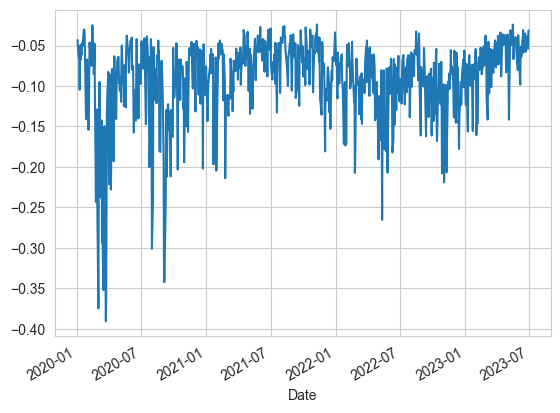

In [78]:
getAlpha(getBeta(apple, 1), getGamma(apple)).plot()